## **Import and explore Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('abalone.csv',header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.columns=['gender','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.isnull().sum()

,0
gender,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [ ]:
df.nunique()

,0
gender,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
Rings,28


In [ ]:
df.dtypes

,0
gender,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


## **Data Cleaning And Pre-Processing**

--- Length ---
Number of IQR outliers: 49
Number of Z-score outliers: 15


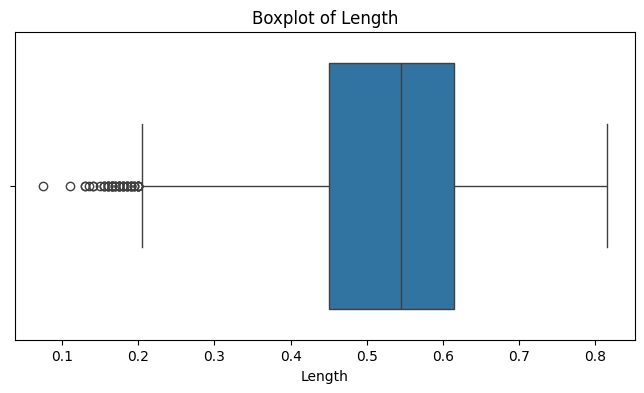

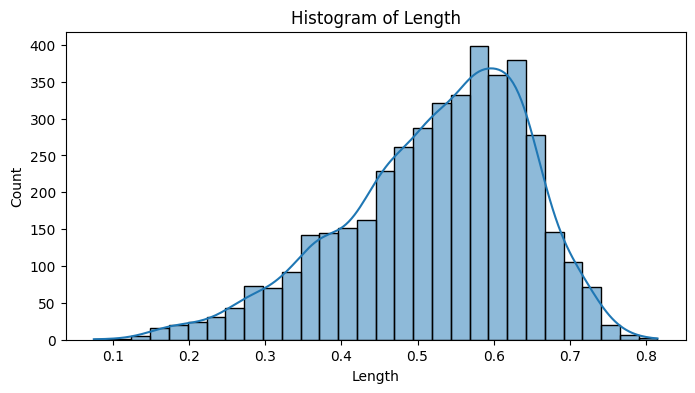

--- Diameter ---
Number of IQR outliers: 59
Number of Z-score outliers: 13


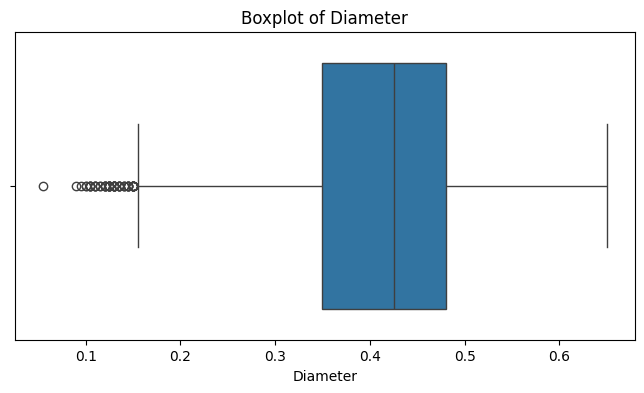

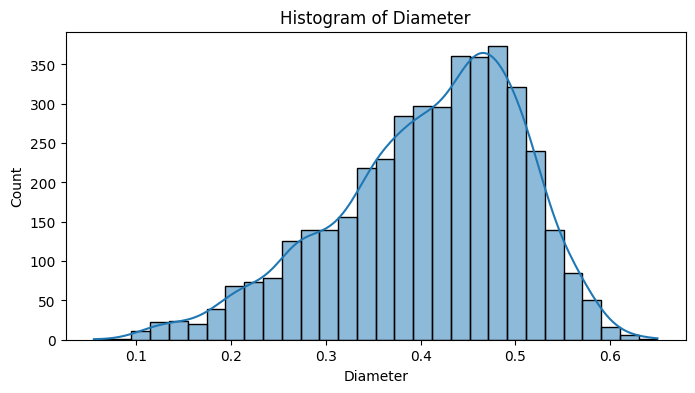

--- Height ---
Number of IQR outliers: 29
Number of Z-score outliers: 5


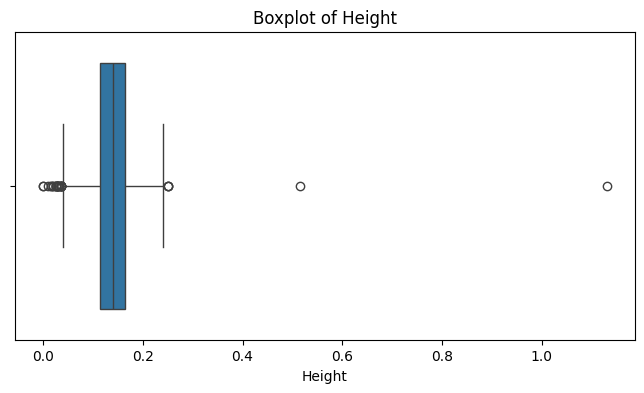

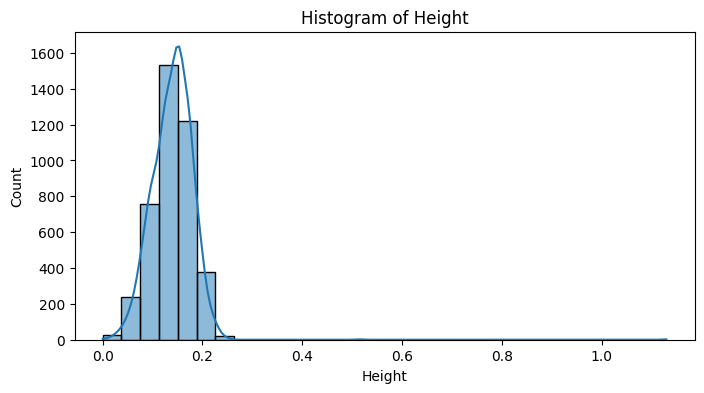

--- Whole weight ---
Number of IQR outliers: 30
Number of Z-score outliers: 19


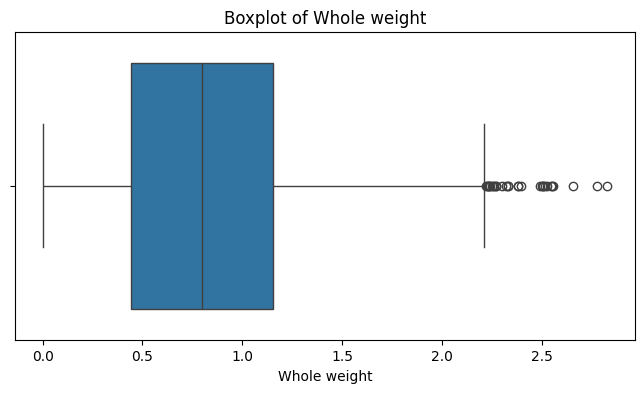

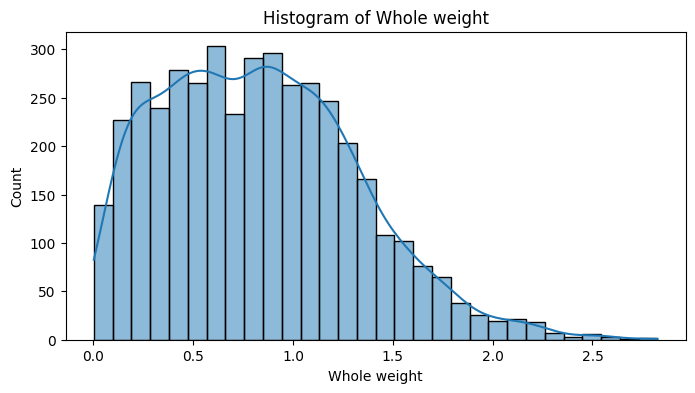

--- Shucked weight ---
Number of IQR outliers: 48
Number of Z-score outliers: 37


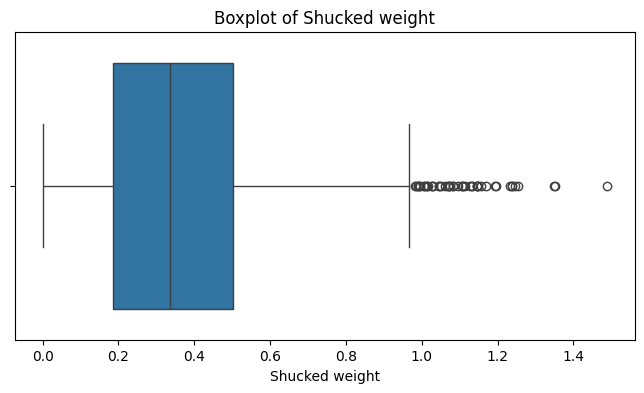

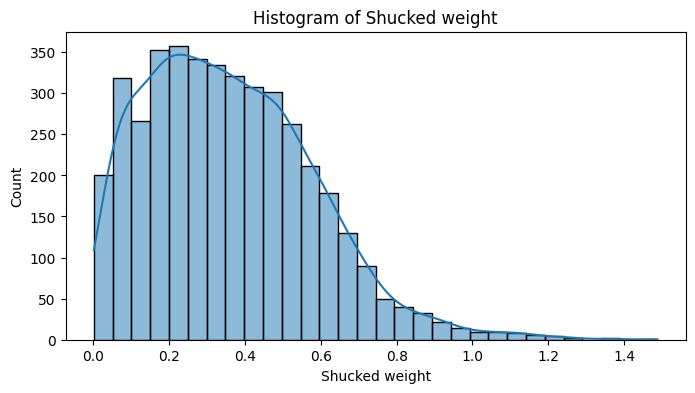

--- Viscera weight ---
Number of IQR outliers: 26
Number of Z-score outliers: 22


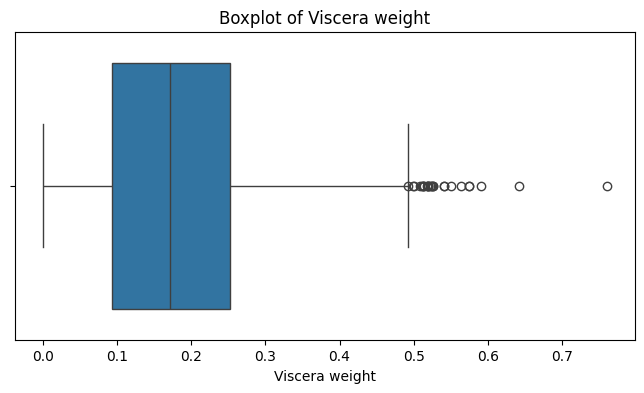

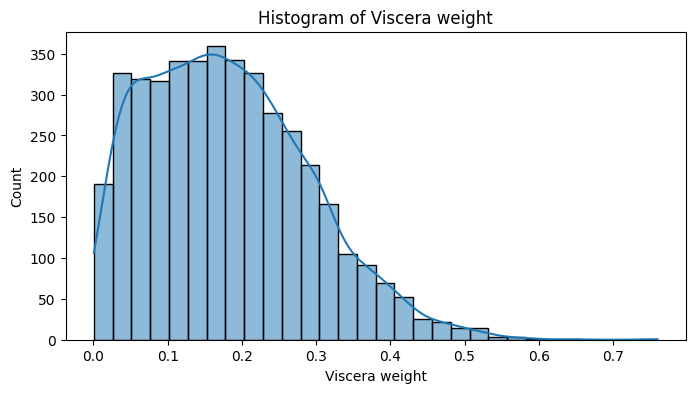

--- Shell weight ---
Number of IQR outliers: 35
Number of Z-score outliers: 27


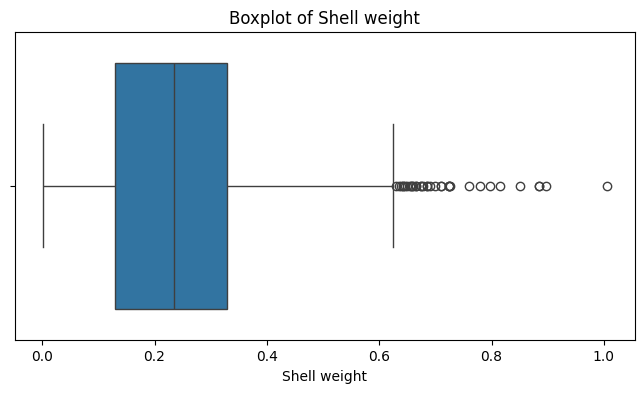

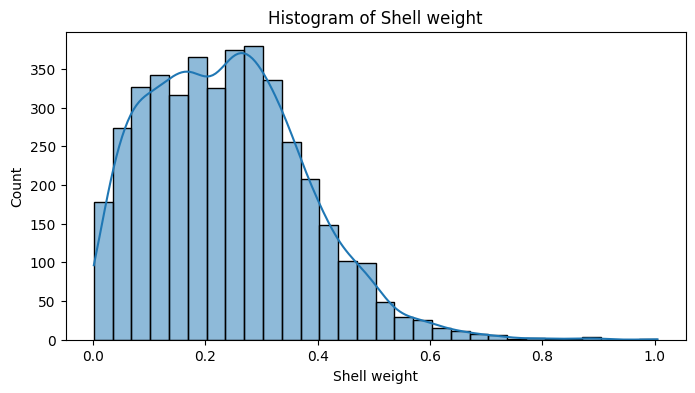

Summary of outliers for each float column:
{'Length': {'IQR': 49, 'Z-score': 15}, 'Diameter': {'IQR': 59, 'Z-score': 13}, 'Height': {'IQR': 29, 'Z-score': 5}, 'Whole weight': {'IQR': 30, 'Z-score': 19}, 'Shucked weight': {'IQR': 48, 'Z-score': 37}, 'Viscera weight': {'IQR': 26, 'Z-score': 22}, 'Shell weight': {'IQR': 35, 'Z-score': 27}}


In [ ]:


float_cols = df.select_dtypes(include=['float64']).columns

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

def find_outliers_zscore(data):
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std
    outliers = data[(z_scores > 3) | (z_scores < -3)]
    return outliers

outlier_summary = {}

for col in float_cols:
    print(f"--- {col} ---")
    iqr_outliers = find_outliers_iqr(df[col])
    zscore_outliers = find_outliers_zscore(df[col])
    print(f"Number of IQR outliers: {len(iqr_outliers)}")
    print(f"Number of Z-score outliers: {len(zscore_outliers)}")
    outlier_summary[col] = {'IQR': len(iqr_outliers), 'Z-score': len(zscore_outliers)}

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

print("Summary of outliers for each float column:")
print(outlier_summary)

In [ ]:
float_cols = df.select_dtypes(include=['float64']).columns

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

cleaned_df = remove_outliers_iqr(df, float_cols)


print(f"Original dataset rows: {len(df)}")
print(f"Cleaned dataset rows: {len(cleaned_df)}")
df=cleaned_df

Original dataset rows: 4177
Cleaned dataset rows: 4013


In [ ]:
df

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## **Visualization 1**

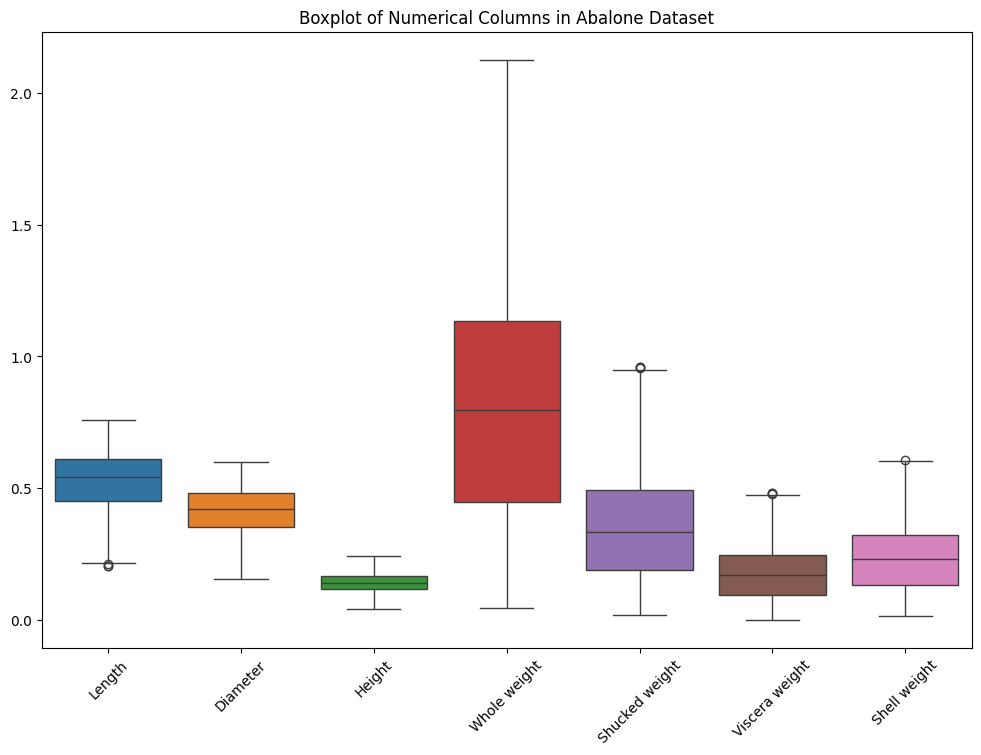

In [ ]:


numerical_columns = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Columns in Abalone Dataset")
plt.xticks(rotation=45)
plt.show()

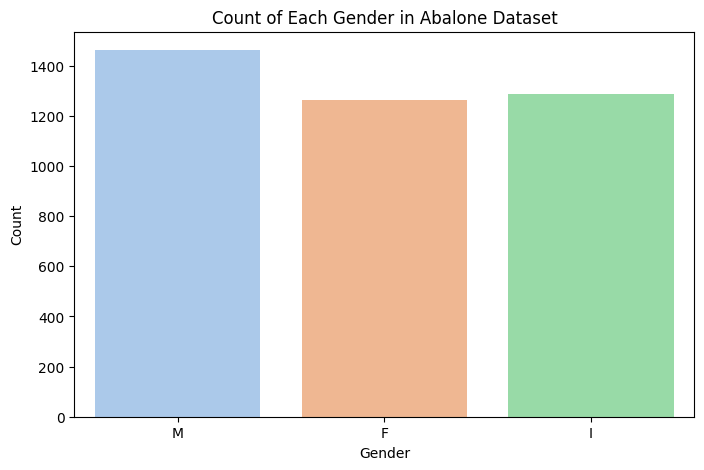

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Count of Each Gender in Abalone Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


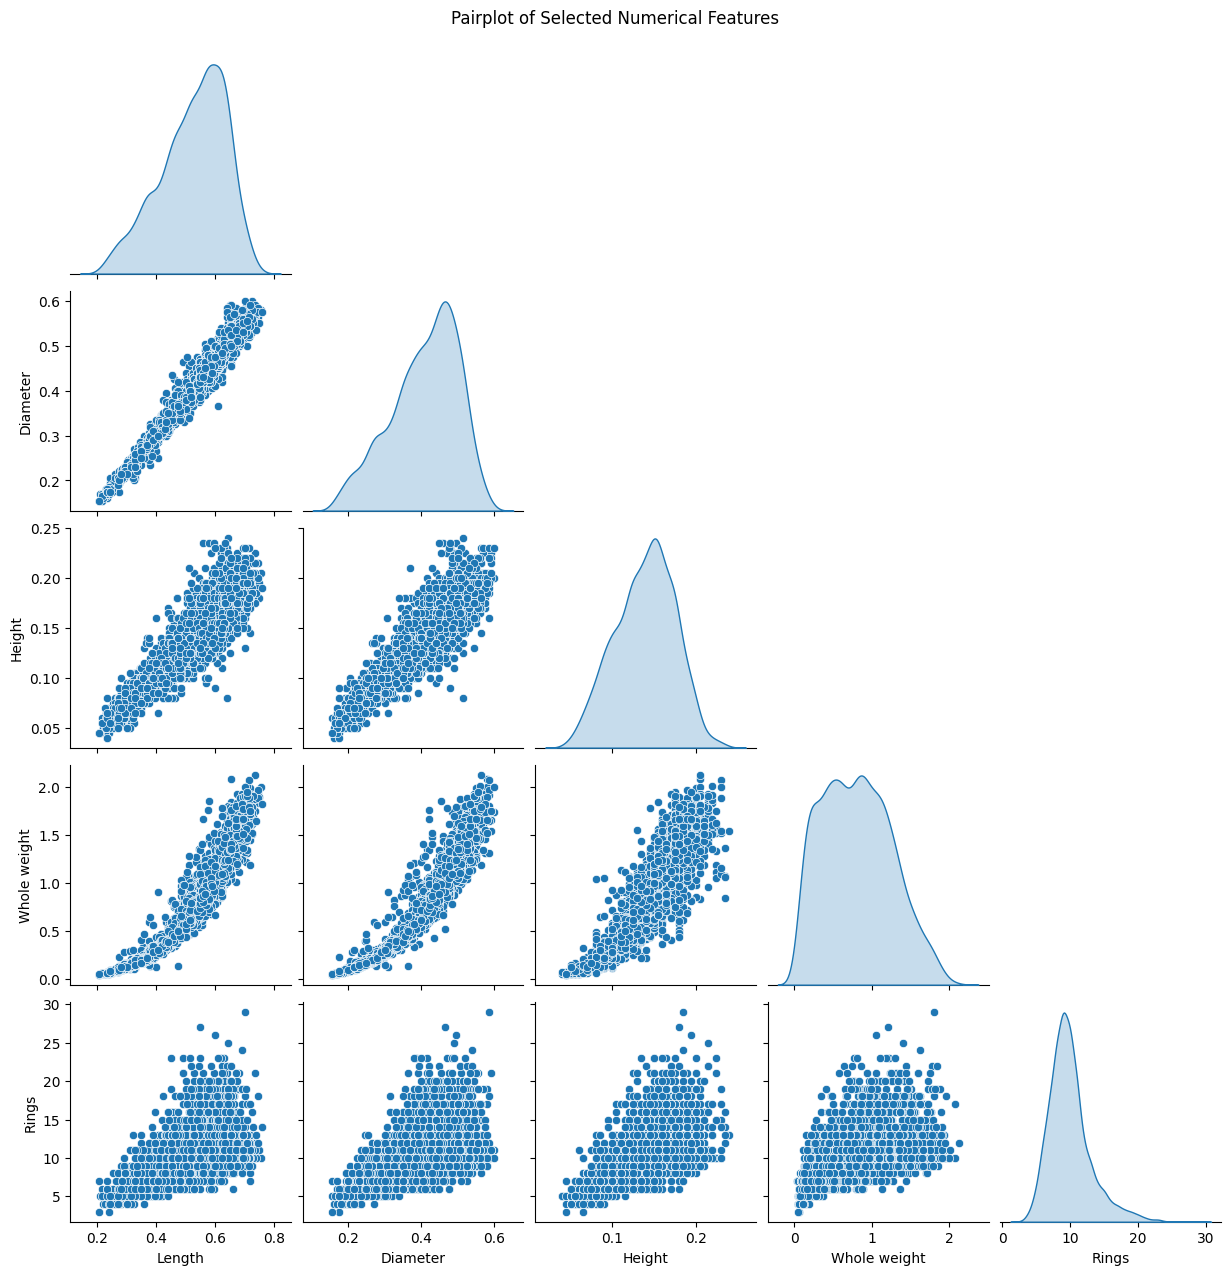

In [ ]:
selected_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Rings']
sns.pairplot(df[selected_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()


## **Feature engineering**

In [ ]:
gender_mapping = {'M': 1, 'F': 2, 'I': 3}
df['gender'] = df['gender'].map(gender_mapping)
df['gender'].isnull().sum()

np.int64(0)

In [ ]:
df
df.dtypes

,0
gender,int64
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


In [ ]:
df.corr()

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
gender,1.000000,-0.437918,-0.448272,-0.442462,-0.459000,-0.436295,-0.451522,-0.447525,-0.337317
Length,-0.437918,1.000000,0.985519,0.889740,0.940036,0.913472,0.912445,0.915753,0.516975
Diameter,-0.448272,0.985519,1.000000,0.896402,0.939106,0.906991,0.907697,0.923392,0.537673
Height,-0.442462,0.889740,0.896402,1.000000,0.891478,0.837605,0.867697,0.898255,0.578849
Whole weight,-0.459000,0.940036,0.939106,0.891478,1.000000,0.968244,0.964702,0.958049,0.516195
Shucked weight,-0.436295,0.913472,0.906991,0.837605,0.968244,1.000000,0.926837,0.886797,0.392160
Viscera weight,-0.451522,0.912445,0.907697,0.867697,0.964702,0.926837,1.000000,0.912473,0.480007
Shell weight,-0.447525,0.915753,0.923392,0.898255,0.958049,0.886797,0.912473,1.000000,0.605703
Rings,-0.337317,0.516975,0.537673,0.578849,0.516195,0.392160,0.480007,0.605703,1.000000


In [ ]:

columns_to_bin = ['Length', 'Diameter', 'Height',
                  'Whole weight', 'Shucked weight',
                  'Viscera weight', 'Shell weight']

bin_edges = []
i=0
while i<=2.5:
    bin_edges.append(round(i,1))
    i+=0.1

bin_labels = []
for i in range(len(bin_edges)-1):
    bin_labels.append(i)

for col in columns_to_bin:
    df[col] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, right=False)
    df[col] = df[col].astype(int)

print(df.head())

df.to_csv('abalone_binned_dataset.csv', index=False)


   gender  Length  Diameter  Height  Whole weight  Shucked weight  \
0       1       4         3       0             5               2   
1       1       3         2       0             2               0   
2       2       5         4       1             6               2   
3       1       4         3       1             5               2   
4       3       3         2       0             2               0   

   Viscera weight  Shell weight  Rings  
0               1             1     15  
1               0             0      7  
2               1             2      9  
3               1             1     10  
4               0             0      7  


In [ ]:
df.dtypes

,0
gender,int64
Length,int64
Diameter,int64
Height,int64
Whole weight,int64
Shucked weight,int64
Viscera weight,int64
Shell weight,int64
Rings,int64


In [ ]:
df.isnull().sum()

,0
gender,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [ ]:
df["RingGroup"] = pd.cut(df["Rings"],bins=[0,8,19,np.inf],labels=[0,1,2])
df.drop(columns=['Rings'],inplace=True)

In [ ]:
df.dtypes

,0
gender,int64
Length,int64
Diameter,int64
Height,int64
Whole weight,int64
Shucked weight,int64
Viscera weight,int64
Shell weight,int64
RingGroup,category


In [ ]:
df

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,RingGroup
0,1,4,3,0,5,2,1,1,1
1,1,3,2,0,2,0,0,0,0
2,2,5,4,1,6,2,1,2,1
3,1,4,3,1,5,2,1,1,1
4,3,3,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4172,2,5,4,1,8,3,2,2,1
4173,1,5,4,1,9,4,2,2,1
4174,1,6,4,2,11,5,2,3,1
4175,2,6,4,1,10,5,2,2,1


## **Visualization 2**

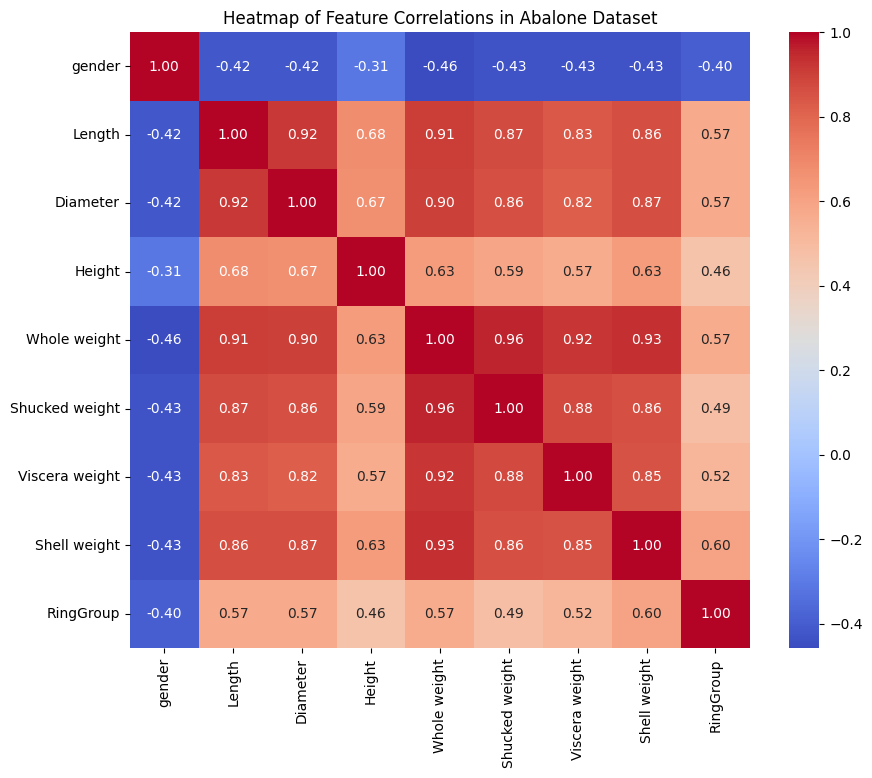

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations in Abalone Dataset")
plt.show()

# **Decision Tree**

In [ ]:
df

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,RingGroup
0,1,4,3,0,5,2,1,1,1
1,1,3,2,0,2,0,0,0,0
2,2,5,4,1,6,2,1,2,1
3,1,4,3,1,5,2,1,1,1
4,3,3,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4172,2,5,4,1,8,3,2,2,1
4173,1,5,4,1,9,4,2,2,1
4174,1,6,4,2,11,5,2,3,1
4175,2,6,4,1,10,5,2,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Decision Tree Classification Evaluation:")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Decision Tree Classification Evaluation:
Accuracy Score: 0.79
Precision Score: 0.79
Recall Score: 0.79
F1 Score: 0.79


# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score


X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

rf_model = RandomForestClassifier( random_state=55)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acs = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Classification Evaluation:")
print(f"Accuracy Score: {acs:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Classification Evaluation:
Accuracy Score: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pruned_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt',
    random_state=55,
    criterion='gini'
)

pruned_rf_model.fit(X_train, y_train)

y_pred_pruned = pruned_rf_model.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned, average='weighted')
recall_pruned = recall_score(y_test, y_pred_pruned, average='weighted')
f1_pruned = f1_score(y_test, y_pred_pruned, average='weighted')

print("Pruned Random Forest Classification Evaluation:")
print(f"Accuracy Score: {accuracy_pruned:.2f}")
print(f"Precision Score: {precision_pruned:.2f}")
print(f"Recall Score: {recall_pruned:.2f}")
print(f"F1 Score: {f1_pruned:.2f}")


Pruned Random Forest Classification Evaluation:
Accuracy Score: 0.81
Precision Score: 0.81
Recall Score: 0.81
F1 Score: 0.80


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

xgb_model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.4, random_state=23)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy with XGBoost: {accuracy:.2f}")
print(f"Precision with XGBoost: {precision:.2f}")
print(f"Recall with XGBoost: {recall:.2f}")
print(f"F1 Score with XGBoost: {f1:.2f}")



Accuracy with XGBoost: 0.79
Precision with XGBoost: 0.79
Recall with XGBoost: 0.79
F1 Score with XGBoost: 0.79


# **Voting**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

clf1 = RandomForestClassifier(random_state=1)
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=100, random_state=0)

eclf1 = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2)], voting='hard')

eclf1 = eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Voting Classifier (Random Forest + Gradient Boosting) Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Voting Classifier (Random Forest + Gradient Boosting) Evaluation:
Accuracy: 0.80
Precision: 0.78
Recall: 0.80
F1 Score: 0.79


# **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Classification Evaluation:")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


KNN Classification Evaluation:
Accuracy Score: 0.78
Precision Score: 0.77
Recall Score: 0.78
F1 Score: 0.78


# **Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Naive Bayes Classification Evaluation:")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Naive Bayes Classification Evaluation:
Accuracy Score: 0.78
Precision Score: 0.79
Recall Score: 0.78
F1 Score: 0.78


# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X = df.drop(columns=['RingGroup'])
y = df['RingGroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

ada_model = AdaBoostClassifier(n_estimators=50, random_state=23)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

print("AdaBoost Classification Evaluation:")
print(f"Accuracy: {accuracy_ada:.2f}")
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1 Score: {f1_ada:.2f}")


AdaBoost Classification Evaluation:
Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1 Score: 0.74


# **Best Model Accuracy and Visualization**

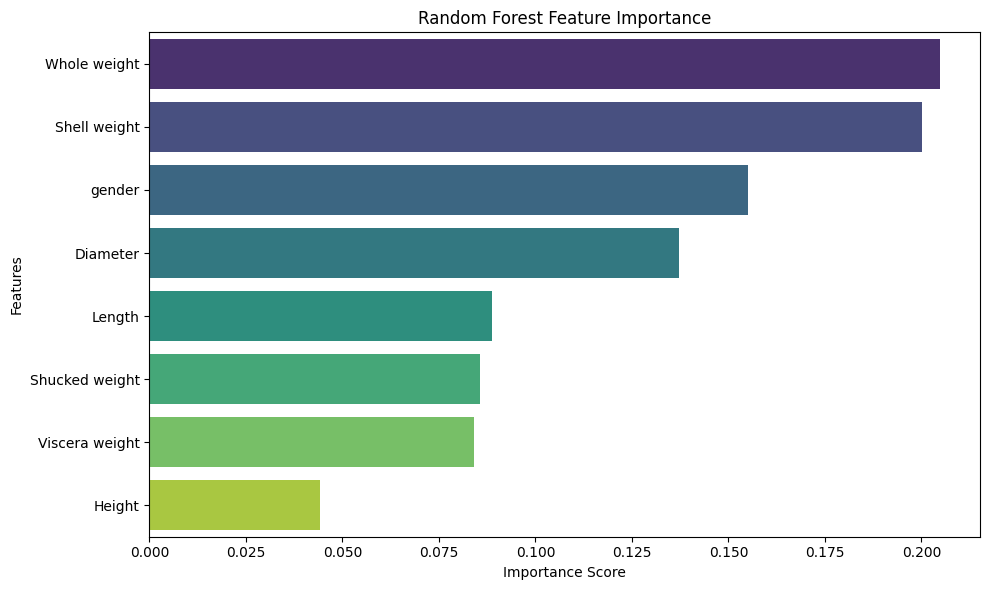

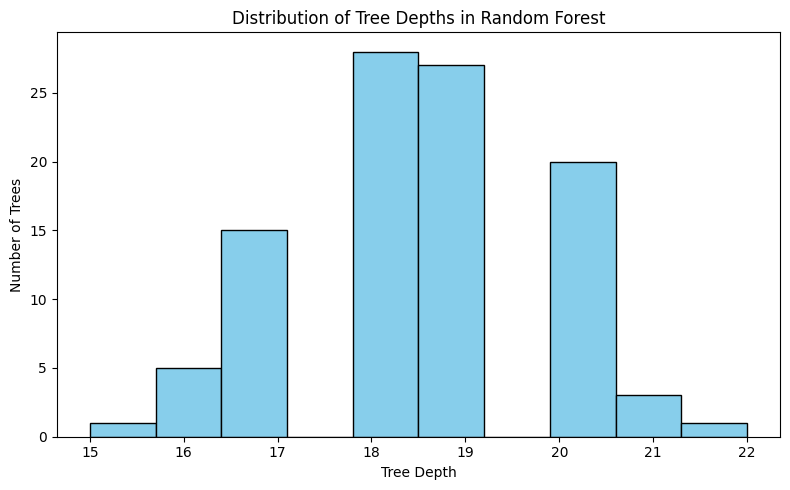

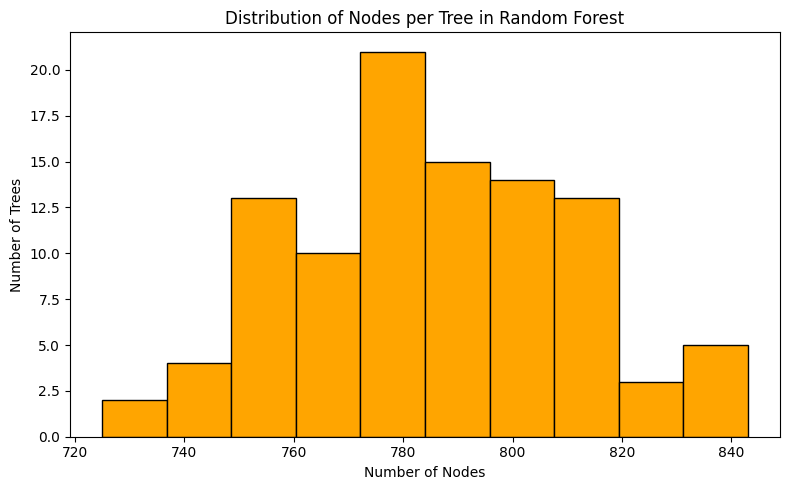

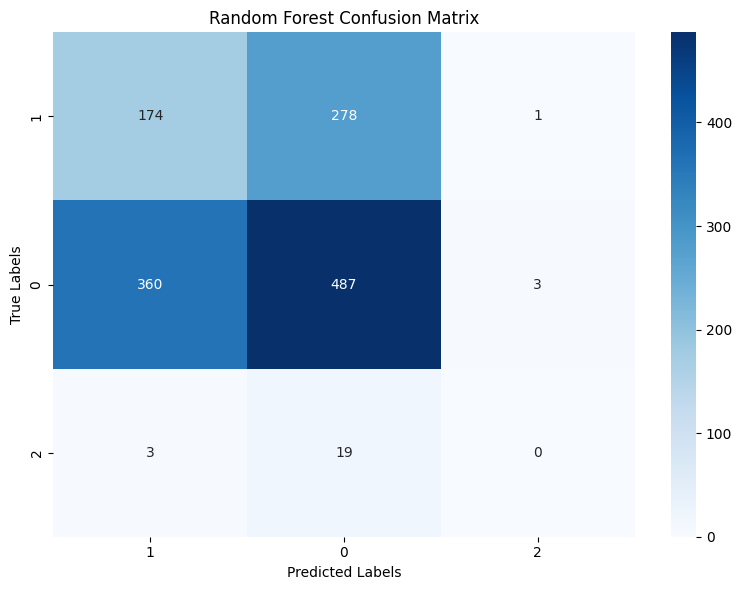


Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.38      0.35       453
           1       0.62      0.57      0.60       850
           2       0.00      0.00      0.00        22

    accuracy                           0.50      1325
   macro avg       0.32      0.32      0.32      1325
weighted avg       0.51      0.50      0.50      1325



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

tree_depths = [estimator.get_depth() for estimator in rf_model.estimators_]

plt.figure(figsize=(8, 5))
plt.hist(tree_depths, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Tree Depths in Random Forest')
plt.xlabel('Tree Depth')
plt.ylabel('Number of Trees')
plt.tight_layout()
plt.show()

tree_nodes = [estimator.tree_.node_count for estimator in rf_model.estimators_]

plt.figure(figsize=(8, 5))
plt.hist(tree_nodes, bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Nodes per Tree in Random Forest')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Trees')
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
